In [9]:
from skimage import data, io, filters
import numpy as np
from numpy import array
from numpy.random import randint
import pandas as pd
from PIL import Image
import os
import sys
from tqdm import tqdm_notebook

from upscaler.data import load_images_from_dir, crop_images, select_random_rows, convert_image_series_to_array

In [10]:
images_all = load_images_from_dir(
    '../images/ukiyo-e_raw/',
    '.jpg',
    limit = 40,
    min_shape = (512,512),
    prog_func = tqdm_notebook
)

In [11]:
images_all = crop_images(
    images_all,
    target_shape = (512,512),
    prog_func = tqdm_notebook
)

In [12]:
random_rows = select_random_rows(images_all, 10, seed = 10)
random_rows = crop_images(random_rows, downscale_ratio=4)

In [5]:
random_rows

,filename,image_size,image_hr,crop_shape,image_cropped,img_cropped_lr
0,0017-courting-komachi-1792.jpg,"(1944, 2969)",<PIL.Image.Image image mode=RGB size=1944x2969...,"(26, 2512, 282, 2768)",<PIL.Image.Image image mode=RGB size=256x256 a...,<PIL.Image.Image image mode=RGB size=64x64 at ...
1,0008-courtesan-s-entourage-at-new-year-s-festi...,"(768, 534)",<PIL.Image.Image image mode=RGB size=768x534 a...,"(236, 19, 492, 275)",<PIL.Image.Image image mode=RGB size=256x256 a...,<PIL.Image.Image image mode=RGB size=64x64 at ...
2,0024-oiran-hanaogi.jpg,"(1424, 2144)",<PIL.Image.Image image mode=RGB size=1424x2144...,"(370, 1729, 626, 1985)",<PIL.Image.Image image mode=RGB size=256x256 a...,<PIL.Image.Image image mode=RGB size=64x64 at ...
3,0001-chrysanthemums-by-a-stream-with-rocks-176...,"(579, 1024)",<PIL.Image.Image image mode=RGB size=579x1024 ...,"(233, 607, 489, 863)",<PIL.Image.Image image mode=RGB size=256x256 a...,<PIL.Image.Image image mode=RGB size=64x64 at ...
4,0026-arashi-ry-z-i-as-ishibe-kinkichi.jpg,"(2715, 3997)",<PIL.Image.Image image mode=RGB size=2715x3997...,"(2290, 3524, 2546, 3780)",<PIL.Image.Image image mode=RGB size=256x256 a...,<PIL.Image.Image image mode=RGB size=64x64 at ...
5,0037-met-dp130188.jpg,"(1292, 1902)",<PIL.Image.Image image mode=RGB size=1292x1902...,"(670, 51, 926, 307)",<PIL.Image.Image image mode=RGB size=256x256 a...,<PIL.Image.Image image mode=RGB size=64x64 at ...
6,0025-sharaku-1794-segawa-tomisabur-as-yadorigi...,"(5000, 7311)",<PIL.Image.Image image mode=RGB size=5000x7311...,"(2824, 440, 3080, 696)",<PIL.Image.Image image mode=RGB size=256x256 a...,<PIL.Image.Image image mode=RGB size=64x64 at ...
7,0026-arashi-ry-z-i-as-ishibe-kinkichi.jpg,"(2715, 3997)",<PIL.Image.Image image mode=RGB size=2715x3997...,"(484, 1010, 740, 1266)",<PIL.Image.Image image mode=RGB size=256x256 a...,<PIL.Image.Image image mode=RGB size=64x64 at ...
8,0038-met-dp130189.jpg,"(1293, 1917)",<PIL.Image.Image image mode=RGB size=1293x1917...,"(385, 155, 641, 411)",<PIL.Image.Image image mode=RGB size=256x256 a...,<PIL.Image.Image image mode=RGB size=64x64 at ...
9,0016-not_detected_233134.jpg,"(526, 800)",<PIL.Image.Image image mode=RGB size=526x800 a...,"(178, 101, 434, 357)",<PIL.Image.Image image mode=RGB size=256x256 a...,<PIL.Image.Image image mode=RGB size=64x64 at ...


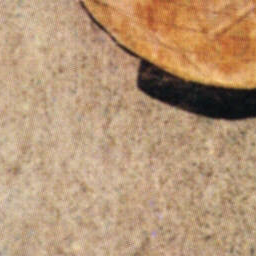

In [6]:
random_rows.image_cropped[0]

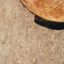

In [7]:
random_rows.image_cropped_lr[0]

In [23]:
convert_image_series_to_array(random_rows.image_cropped[0:7]).shape

(7, 256, 256, 3)

In [31]:
np.array([np.array(img) for img in (random_rows.img_cropped_lr[0:7])]).shape

(7, 64, 64, 3)